### Association Rule

#### Prepare rules for the all the data sets 
- My Movies Dataset

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
data = pd.read_csv("my_movies.csv")
data.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


# Pre-Processing
As the data is not in transaction formation 
We are using transaction Encoder

In [3]:
df=pd.get_dummies(data)
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


# Apriori Algorithm 

### min_support = 0.3

In [7]:
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
frequent_itemsets.head()

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)


Text(0, 0.5, 'support')

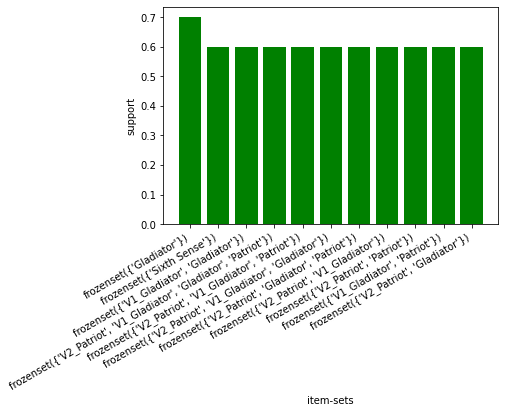

In [8]:
# Most Frequent item sets based on support 
frequent_itemsets.sort_values('support',ascending = False,inplace=True)
import matplotlib.pyplot as plt
plt.bar(list(range(0,11)), frequent_itemsets.support[0:11], color = "green")
plt.xticks(list(range(0,11)),frequent_itemsets.itemsets[0:11])
ax= plt.subplot()
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.xlabel('item-sets')
plt.ylabel('support')

In [9]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
1,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
2,"(V1_Gladiator, V2_Patriot, Gladiator)",(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
3,"(V1_Gladiator, V2_Patriot, Patriot)",(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
4,"(Patriot, V2_Patriot, Gladiator)",(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
...,...,...,...,...,...,...,...,...,...
597,(V1_Gladiator),"(V3_Sixth Sense, V2_Patriot, Patriot, Sixth Se...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
598,(Patriot),"(V3_Sixth Sense, V1_Gladiator, Sixth Sense, V2...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
599,(Sixth Sense),"(V3_Sixth Sense, V2_Patriot, V1_Gladiator, Pat...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
600,(V2_Patriot),"(V3_Sixth Sense, V1_Gladiator, Patriot, Sixth ...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


#####  An leverage value of 0 indicates independence. Range will be [-1 1]
A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [10]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
283,"(V3_Sixth Sense, Gladiator, Patriot)","(Sixth Sense, V1_Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf
584,"(V3_Sixth Sense, V2_Patriot)","(Gladiator, Sixth Sense, V1_Gladiator, Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
349,"(V3_Sixth Sense, V1_Gladiator)","(Sixth Sense, V2_Patriot, Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf
106,"(Sixth Sense, V1_Gladiator)","(V3_Sixth Sense, Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf
351,"(V3_Sixth Sense, V2_Patriot)","(Sixth Sense, V1_Gladiator, Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf
352,"(V3_Sixth Sense, Gladiator)","(V2_Patriot, Sixth Sense, V1_Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf
111,"(V3_Sixth Sense, Gladiator)","(Sixth Sense, V1_Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf
353,"(Sixth Sense, V1_Gladiator)","(V3_Sixth Sense, V2_Patriot, Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf
114,(V3_Sixth Sense),"(Sixth Sense, V1_Gladiator, Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf
575,"(Sixth Sense, V1_Gladiator, Gladiator)","(V3_Sixth Sense, V2_Patriot, Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf


In [11]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
1,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
2,"(V1_Gladiator, V2_Patriot, Gladiator)",(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
3,"(V1_Gladiator, V2_Patriot, Patriot)",(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
4,"(Patriot, V2_Patriot, Gladiator)",(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
...,...,...,...,...,...,...,...,...,...
597,(V1_Gladiator),"(V3_Sixth Sense, V2_Patriot, Patriot, Sixth Se...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
598,(Patriot),"(V3_Sixth Sense, V1_Gladiator, Sixth Sense, V2...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
599,(Sixth Sense),"(V3_Sixth Sense, V2_Patriot, V1_Gladiator, Pat...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
600,(V2_Patriot),"(V3_Sixth Sense, V1_Gladiator, Patriot, Sixth ...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


In [12]:
########################## To eliminate Redudancy in Rules #################################### 
def to_list(i):
    return (sorted(list(i)))

In [13]:
ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)
ma_X = ma_X.apply(sorted)
ma_X

0                              [Gladiator, V1_Gladiator]
1                              [Gladiator, V1_Gladiator]
2         [Gladiator, Patriot, V1_Gladiator, V2_Patriot]
3         [Gladiator, Patriot, V1_Gladiator, V2_Patriot]
4         [Gladiator, Patriot, V1_Gladiator, V2_Patriot]
                             ...                        
597    [Gladiator, Patriot, Sixth Sense, V1_Gladiator...
598    [Gladiator, Patriot, Sixth Sense, V1_Gladiator...
599    [Gladiator, Patriot, Sixth Sense, V1_Gladiator...
600    [Gladiator, Patriot, Sixth Sense, V1_Gladiator...
601    [Gladiator, Patriot, Sixth Sense, V1_Gladiator...
Length: 602, dtype: object

In [14]:
rules_sets = list(ma_X)
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

In [15]:
# getting rules without any redudancy 
rules_no_redudancy  = rules.iloc[index_rules,:]

In [16]:
# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
488,"(Sixth Sense, V2_Patriot)",(Patriot),0.4,0.6,0.4,1.0,1.666667,0.16,inf
202,"(V3_Sixth Sense, V2_Patriot, Gladiator)",(Patriot),0.4,0.6,0.4,1.0,1.666667,0.16,inf
456,(V3_Sixth Sense),(V2_Patriot),0.4,0.6,0.4,1.0,1.666667,0.16,inf
230,"(V1_Gladiator, V3_Sixth Sense, V2_Patriot)",(Patriot),0.4,0.6,0.4,1.0,1.666667,0.16,inf
446,"(V3_Sixth Sense, V1_Gladiator)",(Patriot),0.4,0.6,0.4,1.0,1.666667,0.16,inf
130,"(V1_Gladiator, Sixth Sense, V2_Patriot)",(Patriot),0.4,0.6,0.4,1.0,1.666667,0.16,inf
482,"(Sixth Sense, V1_Gladiator)",(Patriot),0.4,0.6,0.4,1.0,1.666667,0.16,inf
38,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
42,"(V1_Gladiator, Gladiator)",(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
2,"(V1_Gladiator, V2_Patriot, Gladiator)",(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf


# Apriori Algorithm 

### min_support = 0.5

In [17]:
frequent_itemsets1 = apriori(df, min_support=0.5, use_colnames=True)
frequent_itemsets1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
5,0.5,"(Sixth Sense, Gladiator)"
6,0.6,"(Gladiator, Patriot)"
7,0.6,"(V1_Gladiator, Gladiator)"
8,0.6,"(V2_Patriot, Gladiator)"
9,0.6,"(V1_Gladiator, Patriot)"


Text(0, 0.5, 'support')

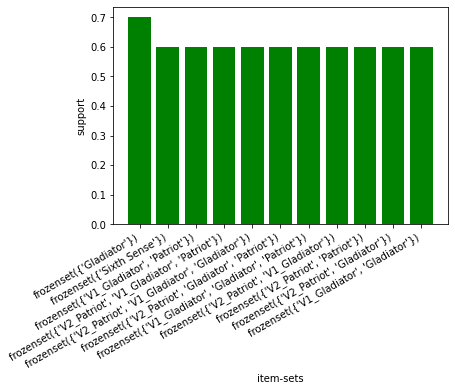

In [18]:
# Most Frequent item sets based on support 
frequent_itemsets1.sort_values('support',ascending = False,inplace=True)
import matplotlib.pyplot as plt
plt.bar(list(range(0,11)), frequent_itemsets1.support[0:11], color = "green")
plt.xticks(list(range(0,11)),frequent_itemsets1.itemsets[0:11])
ax= plt.subplot()
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.xlabel('item-sets')
plt.ylabel('support')

In [19]:
rules1 = association_rules(frequent_itemsets1, metric="lift", min_threshold=1)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
1,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
2,"(V1_Gladiator, V2_Patriot)",(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
3,"(V2_Patriot, Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
4,"(V1_Gladiator, Patriot)",(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
5,(V2_Patriot),"(V1_Gladiator, Patriot)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
6,(V1_Gladiator),"(V2_Patriot, Patriot)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
7,(Patriot),"(V1_Gladiator, V2_Patriot)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
8,"(V1_Gladiator, V2_Patriot)",(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
9,"(V2_Patriot, Gladiator)",(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


#####  An leverage value of 0 indicates independence. Range will be [-1 1]
A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [20]:
rules1.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
22,"(Gladiator, Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
25,(Patriot),"(V1_Gladiator, Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
1,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
27,(V1_Gladiator),(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
28,(V2_Patriot),(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
29,(Patriot),(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
36,"(V1_Gladiator, V2_Patriot, Gladiator)",(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
38,"(Patriot, V2_Patriot, Gladiator)",(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
39,"(Patriot, V1_Gladiator, Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf


In [21]:
rules1[rules1.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
1,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
2,"(V1_Gladiator, V2_Patriot)",(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
3,"(V2_Patriot, Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
4,"(V1_Gladiator, Patriot)",(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
5,(V2_Patriot),"(V1_Gladiator, Patriot)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
6,(V1_Gladiator),"(V2_Patriot, Patriot)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
7,(Patriot),"(V1_Gladiator, V2_Patriot)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
8,"(V1_Gladiator, V2_Patriot)",(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
9,"(V2_Patriot, Gladiator)",(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


In [22]:
ma_X1 = rules1.antecedents.apply(to_list)+rules1.consequents.apply(to_list)
ma_X1 = ma_X1.apply(sorted)
ma_X1

0                            [Patriot, V1_Gladiator]
1                            [Patriot, V1_Gladiator]
2                [Patriot, V1_Gladiator, V2_Patriot]
3                [Patriot, V1_Gladiator, V2_Patriot]
4                [Patriot, V1_Gladiator, V2_Patriot]
5                [Patriot, V1_Gladiator, V2_Patriot]
6                [Patriot, V1_Gladiator, V2_Patriot]
7                [Patriot, V1_Gladiator, V2_Patriot]
8              [Gladiator, V1_Gladiator, V2_Patriot]
9              [Gladiator, V1_Gladiator, V2_Patriot]
10             [Gladiator, V1_Gladiator, V2_Patriot]
11             [Gladiator, V1_Gladiator, V2_Patriot]
12             [Gladiator, V1_Gladiator, V2_Patriot]
13             [Gladiator, V1_Gladiator, V2_Patriot]
14                  [Gladiator, Patriot, V2_Patriot]
15                  [Gladiator, Patriot, V2_Patriot]
16                  [Gladiator, Patriot, V2_Patriot]
17                  [Gladiator, Patriot, V2_Patriot]
18                  [Gladiator, Patriot, V2_Pa

In [23]:
rules_sets1 = list(ma_X1)
rules_sets1

[['Patriot', 'V1_Gladiator'],
 ['Patriot', 'V1_Gladiator'],
 ['Patriot', 'V1_Gladiator', 'V2_Patriot'],
 ['Patriot', 'V1_Gladiator', 'V2_Patriot'],
 ['Patriot', 'V1_Gladiator', 'V2_Patriot'],
 ['Patriot', 'V1_Gladiator', 'V2_Patriot'],
 ['Patriot', 'V1_Gladiator', 'V2_Patriot'],
 ['Patriot', 'V1_Gladiator', 'V2_Patriot'],
 ['Gladiator', 'V1_Gladiator', 'V2_Patriot'],
 ['Gladiator', 'V1_Gladiator', 'V2_Patriot'],
 ['Gladiator', 'V1_Gladiator', 'V2_Patriot'],
 ['Gladiator', 'V1_Gladiator', 'V2_Patriot'],
 ['Gladiator', 'V1_Gladiator', 'V2_Patriot'],
 ['Gladiator', 'V1_Gladiator', 'V2_Patriot'],
 ['Gladiator', 'Patriot', 'V2_Patriot'],
 ['Gladiator', 'Patriot', 'V2_Patriot'],
 ['Gladiator', 'Patriot', 'V2_Patriot'],
 ['Gladiator', 'Patriot', 'V2_Patriot'],
 ['Gladiator', 'Patriot', 'V2_Patriot'],
 ['Gladiator', 'Patriot', 'V2_Patriot'],
 ['Gladiator', 'Patriot', 'V1_Gladiator'],
 ['Gladiator', 'Patriot', 'V1_Gladiator'],
 ['Gladiator', 'Patriot', 'V1_Gladiator'],
 ['Gladiator', 'Patriot',

In [24]:
unique_rules_sets1 = [list(m) for m in set(tuple(i) for i in rules_sets1)]
unique_rules_sets1

[['Gladiator', 'V2_Patriot'],
 ['V1_Gladiator', 'V2_Patriot'],
 ['Gladiator', 'Sixth Sense'],
 ['Gladiator', 'Patriot', 'V2_Patriot'],
 ['Gladiator', 'Patriot', 'V1_Gladiator', 'V2_Patriot'],
 ['Patriot', 'V1_Gladiator', 'V2_Patriot'],
 ['Patriot', 'V1_Gladiator'],
 ['Gladiator', 'V1_Gladiator'],
 ['Gladiator', 'Patriot', 'V1_Gladiator'],
 ['Gladiator', 'Patriot'],
 ['Gladiator', 'V1_Gladiator', 'V2_Patriot'],
 ['Patriot', 'V2_Patriot']]

In [25]:
index_rules1 = []
for i in unique_rules_sets1:
    index_rules1.append(rules_sets1.index(i))

In [26]:
# getting rules without any redudancy 
rules_no_redudancy1  = rules1.iloc[index_rules1,:]

In [27]:
# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy1.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
26,(V2_Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
14,"(V2_Patriot, Gladiator)",(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
36,"(V1_Gladiator, V2_Patriot, Gladiator)",(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
2,"(V1_Gladiator, V2_Patriot)",(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
0,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
20,"(V1_Gladiator, Gladiator)",(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
28,(V2_Patriot),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
34,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
30,(V2_Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
32,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
